In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read Data as DataFrame from .csv file
df = pd.read_csv('lastfm-matrix-germany.csv', header = None)

In [3]:
# Dropping Columns names and user ids
df = df.drop(columns = [0])
df = df.drop([0])
df

,1,2,3,4,5,6,7,8,9,10,...,276,277,278,279,280,281,282,283,284,285
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1254,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1255,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Coverting into 2D array and Saving cleaned dataset for a later retrieval purpose
X = np.c_[df]
np.save("Clean_Dataset", X)
X

array([['0', '1', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ...,
       ['0', '0', '1', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0']], dtype=object)

In [11]:
# PCA decomposition for reducing dimentions for determining number of clusters for Kmeans
from sklearn import decomposition
aa=decomposition.PCA(n_components=10)
data_x=aa.fit_transform(X)
data_x

array([[-0.13507458,  0.01602376, -0.0942517 , ..., -0.0219037 ,
         0.50677368, -0.02231647],
       [ 0.80158844,  1.48697122,  0.56865073, ..., -0.03892301,
         0.5069861 ,  0.31955231],
       [-0.15409709, -0.65698214,  0.2818412 , ..., -0.48073481,
        -0.01937929, -0.07522951],
       ...,
       [ 0.4564619 , -1.58076703, -0.84837294, ...,  0.12235023,
         0.81245246, -0.36300012],
       [-0.38934959, -0.25221151, -0.05976355, ...,  0.36063224,
         0.05342551,  0.14023493],
       [-0.63868622,  0.82019242, -0.54484838, ...,  0.0974692 ,
        -0.47527062,  0.01246281]])

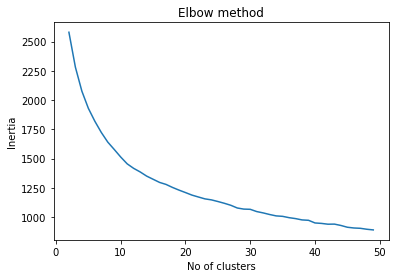

In [12]:
# Using Elbow method for finding best number of Clusters
from sklearn.cluster import KMeans
Inertia =[]
for i in range(2, 50):
    kmeans = KMeans(n_clusters = i)#.fit(x)
    kmeans.fit(data_x)
    Inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(2, 50), Inertia)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Slecting number of Clusters = 20
kmeans = KMeans(n_clusters = 20)
kmeans.fit(X)

KMeans(n_clusters=20)

In [9]:
predict = kmeans.predict(X)
predict

array([19, 12, 19, ...,  6, 19,  4])

In [11]:
# Export Kmeans Trained Model as "GenresKmeans.pickle" file
import pickle
filename = "GenresKmeans.pickle"

# save model
pickle.dump(kmeans, open(filename, "wb"))